<a href="https://colab.research.google.com/github/Pimchanokz/ML/blob/main/Lab3_3_Classification_TwinkleMT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB 3 - PART 3 Classification**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import metrics
import pandas_datareader.data as web
from sklearn import model_selection
pd.options.display.float_format = '{:.3f}'.format

#### **Read csv file**

In [ ]:
### START CODE HERE ###
df = pd.read_csv("/content/drive/MyDrive/Coffee-modified.csv", header=0)

df
### END CODE HERE ###

,ID,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.000,2200.000,2075.000
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.000,2200.000,2075.000
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.000,1800.000,1700.000
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.000,2200.000,2000.000
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.000,2200.000,2075.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1307,Arabica,juan carlos garcia lopez,Mexico,el centenario,NaN,"la esperanza, municipio juchique de ferrer, ve...",1104328663,terra mia,900,...,None,20,"September 17th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,900.000,900.000,900.000
1307,1308,Arabica,myriam kaplan-pasternak,Haiti,200 farms,NaN,coeb koperativ ekselsyo basen (350 members),NaN,haiti coffee,~350m,...,Blue-Green,16,"May 24th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,350.000,350.000,350.000
1308,1309,Arabica,"exportadora atlantic, s.a.",Nicaragua,finca las marÃ­as,017-053-0211/ 017-053-0212,beneficio atlantic condega,017-053-0211/ 017-053-0212,exportadora atlantic s.a,1100,...,Green,5,"June 6th, 2018",Instituto HondureÃ±o del CafÃ©,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1100.000,1100.000,1100.000
1309,1310,Arabica,juan luis alvarado romero,Guatemala,finca el limon,NaN,beneficio serben,11/853/165,unicafe,4650,...,Green,4,"May 24th, 2013",Asociacion Nacional Del CafÃ©,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1417.320,1417.320,1417.320


In [ ]:
from google.colab import drive
drive.mount('/content/drive') #เนื่องจาก save ในไดฟ์

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Select only `['Total.Cup.Points', 'Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor',
         'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters']`

In [ ]:
### START CODE HERE ###
df = df[['Total.Cup.Points', 'Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters']]
### END CODE HERE ###
df #เลือก

,Total.Cup.Points,Species,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,90.580,Arabica,Ethiopia,Washed / Wet,8.670,8.830,8.670,8.750,8.500,8.420,10.000,0.120,2075.000
1,89.920,Arabica,Ethiopia,Washed / Wet,8.750,8.670,8.500,8.580,8.420,8.420,10.000,0.120,2075.000
2,89.750,Arabica,Guatemala,NaN,8.420,8.500,8.420,8.420,8.330,8.420,10.000,0.000,1700.000
3,89.000,Arabica,Ethiopia,Natural / Dry,8.170,8.580,8.420,8.420,8.500,8.250,10.000,0.110,2000.000
4,88.830,Arabica,Ethiopia,Washed / Wet,8.250,8.500,8.250,8.500,8.420,8.330,10.000,0.120,2075.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,68.330,Arabica,Mexico,Washed / Wet,7.080,6.830,6.250,7.420,7.250,6.750,10.000,0.110,900.000
1307,67.920,Arabica,Haiti,Natural / Dry,6.750,6.580,6.420,6.670,7.080,6.670,9.330,0.140,350.000
1308,63.080,Arabica,Nicaragua,Other,7.250,6.580,6.330,6.250,6.420,6.080,6.000,0.130,1100.000
1309,59.830,Arabica,Guatemala,Washed / Wet,7.500,6.670,6.670,7.670,7.330,6.670,8.000,0.100,1417.320


**Drop NA**


In [ ]:
### START CODE HERE ###
df = df.dropna()
### END CODE HERE ###
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1309
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Total.Cup.Points      1003 non-null   float64
 1   Species               1003 non-null   object 
 2   Country.of.Origin     1003 non-null   object 
 3   Processing.Method     1003 non-null   object 
 4   Aroma                 1003 non-null   float64
 5   Flavor                1003 non-null   float64
 6   Aftertaste            1003 non-null   float64
 7   Acidity               1003 non-null   float64
 8   Body                  1003 non-null   float64
 9   Balance               1003 non-null   float64
 10  Uniformity            1003 non-null   float64
 11  Moisture              1003 non-null   float64
 12  altitude_mean_meters  1003 non-null   float64
dtypes: float64(10), object(3)
memory usage: 109.7+ KB


,Total.Cup.Points,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
count,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000
mean,82.127,7.567,7.514,7.386,7.526,7.504,7.499,9.870,0.095,1816.792
std,2.632,0.301,0.324,0.333,0.308,0.273,0.341,0.445,0.043,9112.473
min,59.830,5.080,6.170,6.170,5.250,6.330,6.080,6.000,0.000,1.000
25%,81.170,7.420,7.330,7.170,7.330,7.330,7.330,10.000,0.100,1100.000
50%,82.420,7.580,7.500,7.420,7.500,7.500,7.500,10.000,0.110,1310.640
75%,83.580,7.750,7.670,7.580,7.670,7.670,7.670,10.000,0.120,1600.000
max,90.580,8.750,8.830,8.670,8.750,8.500,8.580,10.000,0.170,190164.000


Let's `Y` be  `Total.Cup.Points` and X be the rest except in  `Y`.

In [ ]:
### START CODE HERE ###
Y = df[['Total.Cup.Points']]
X = df.loc[:, df.columns != ('Total.Cup.Points')]
### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- X : `['Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor','Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture','altitude_mean_meters']`
- Y : `['Total.Cup.Points']`

</details>

In [ ]:
print(X.columns)
print(Y.columns)

Index(['Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture',
       'altitude_mean_meters'],
      dtype='object')
Index(['Total.Cup.Points'], dtype='object')


**Labeling Bean_grade value using percentile**

- Bean_grade = 1 ; `if Y < rating_pctile[0] 75 percentile`
- Bean_grade = 2 ; `if rating_pctile[0] <= Y < rating_pctile[1] 90 percentile`
- Bean_grade = 3 ; `if Y >= rating_pctile[1]`


In [ ]:
### START CODE HERE ###

rating_pctile = [np.percentile(df['Total.Cup.Points'], 75), np.percentile(df['Total.Cup.Points'], 90)] #ใช้สำหรับคำนวน Percentile ของกาแฟ

# Function to label Bean_grade
def label_bean_grade(value):
    if value < rating_pctile[0]:
        return 1
    elif value < rating_pctile[1]:
        return 2
    else:
        return 3

# Applying the function to create the Bean_grade column
Y = Y['Total.Cup.Points'].apply(label_bean_grade) #เปลี่ยนข้อมูลตามเกรดกาแฟ

### END CODE HERE ###
Y

0       3
1       3
3       3
4       3
9       3
       ..
1305    1
1306    1
1307    1
1308    1
1309    1
Name: Total.Cup.Points, Length: 1003, dtype: int64

**Plot Bar graph that show count of each `Bean_grade`.**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

![image.png](attachment:image.png)

</details>

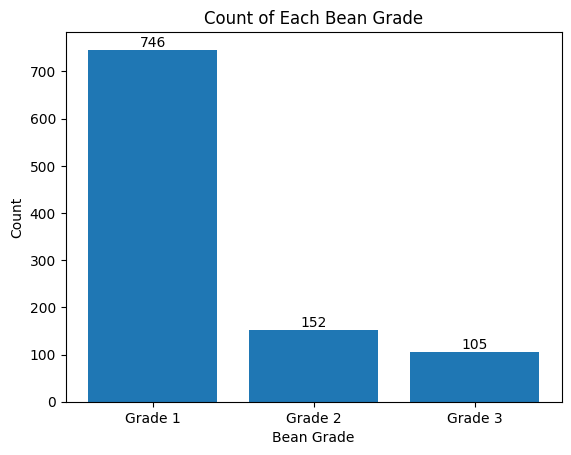

In [ ]:
### START CODE HERE ###

import matplotlib.pyplot as plt

# Count the occurrences of each Bean_grade
grade_counts = Y.value_counts().sort_index() ##เอา123มาทำกราฟ

# Plotting the bar graph
plt.bar(grade_counts.index, grade_counts.values)

# Adding labels and title
plt.xlabel('Bean Grade')
plt.ylabel('Count')
plt.title('Count of Each Bean Grade')

# Adding tick labels
plt.xticks(grade_counts.index, ['Grade 1', 'Grade 2', 'Grade 3'])
for i, count in enumerate(grade_counts.values):
    plt.text(i + 1, count, str(count), ha='center', va='bottom')
# Display the plot
plt.show()
# สร้างบาร์สำหรับแต่ละเกรอ

### END CODE HERE ###

**Standardize X's numeric data**

In [ ]:
### START CODE HERE ###
from sklearn.preprocessing import StandardScaler

numeric_columns = X.select_dtypes(include=['number']).columns
non_numeric_columns = X.select_dtypes(exclude=['number']).columns
# Standardize the numeric columns
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])
X[numeric_columns]
### END CODE HERE ###

<ipython-input-129-26920d6b1997>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_columns] = scaler.fit_transform(X[numeric_columns])


,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,3.660,4.058,3.862,3.978,3.651,2.703,0.292,0.576,0.028
1,3.926,3.565,3.351,3.425,3.358,2.703,0.292,0.576,0.028
3,2.000,3.288,3.110,2.905,3.651,2.204,0.292,0.346,0.020
4,2.266,3.041,2.599,3.165,3.358,2.439,0.292,0.576,0.028
9,1.702,3.288,3.351,3.165,0.608,2.703,0.292,0.115,0.001
...,...,...,...,...,...,...,...,...,...
1305,-1.884,-3.650,-3.655,-3.335,-3.059,-3.902,-4.201,0.115,-0.040
1306,-1.618,-2.108,-3.415,-0.345,-0.933,-2.200,0.292,0.346,-0.101
1307,-2.714,-2.879,-2.904,-2.783,-1.556,-2.435,-1.214,1.036,-0.161
1308,-1.054,-2.879,-3.174,-4.148,-3.976,-4.167,-8.694,0.806,-0.079


**Drop the columns that have correlation more than 0.8.**

In [ ]:
### START CODE HERE ###

correlation_matrix = X[numeric_columns].corr()
print(correlation_matrix)
Xnum_columns = X[numeric_columns].columns

to_drop = [ ]
#เช็คค่า cor ระหว่าง c1-c2 มากกว่า 0.8 drop
for c1 in Xnum_columns:
  for c2 in Xnum_columns:
    if c1 != c2 and c2 not in to_drop and correlation_matrix[c1][c2] > 0.8:
      to_drop.append(c1)

X = X.drop(columns=to_drop)
print(to_drop)
### END CODE HERE ###

                      Aroma  Flavor  Aftertaste  Acidity   Body  Balance  \
Aroma                 1.000   0.731       0.678    0.603  0.552    0.612   
Flavor                0.731   1.000       0.848    0.753  0.685    0.734   
Aftertaste            0.678   0.848       1.000    0.690  0.685    0.765   
Acidity               0.603   0.753       0.690    1.000  0.618    0.644   
Body                  0.552   0.685       0.685    0.618  1.000    0.702   
Balance               0.612   0.734       0.765    0.644  0.702    1.000   
Uniformity            0.135   0.223       0.242    0.192  0.133    0.243   
Moisture             -0.078  -0.120      -0.166   -0.100 -0.201   -0.217   
altitude_mean_meters -0.020  -0.013      -0.027    0.003 -0.019   -0.017   

                      Uniformity  Moisture  altitude_mean_meters  
Aroma                      0.135    -0.078                -0.020  
Flavor                     0.223    -0.120                -0.013  
Aftertaste                 0.242    -0

In [ ]:
X

,Species,Country.of.Origin,Processing.Method,Aroma,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,Arabica,Ethiopia,Washed / Wet,3.660,3.862,3.978,3.651,2.703,0.292,0.576,0.028
1,Arabica,Ethiopia,Washed / Wet,3.926,3.351,3.425,3.358,2.703,0.292,0.576,0.028
3,Arabica,Ethiopia,Natural / Dry,2.000,3.110,2.905,3.651,2.204,0.292,0.346,0.020
4,Arabica,Ethiopia,Washed / Wet,2.266,2.599,3.165,3.358,2.439,0.292,0.576,0.028
9,Arabica,Ethiopia,Natural / Dry,1.702,3.351,3.165,0.608,2.703,0.292,0.115,0.001
...,...,...,...,...,...,...,...,...,...,...,...
1305,Arabica,Honduras,Washed / Wet,-1.884,-3.655,-3.335,-3.059,-3.902,-4.201,0.115,-0.040
1306,Arabica,Mexico,Washed / Wet,-1.618,-3.415,-0.345,-0.933,-2.200,0.292,0.346,-0.101
1307,Arabica,Haiti,Natural / Dry,-2.714,-2.904,-2.783,-1.556,-2.435,-1.214,1.036,-0.161
1308,Arabica,Nicaragua,Other,-1.054,-3.174,-4.148,-3.976,-4.167,-8.694,0.806,-0.079


**One hot encode non-numeric columns**
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `pd.get_dummies()`
</details>

In [ ]:
### START CODE HERE ###
X = pd.get_dummies(X, columns=non_numeric_columns)

### END CODE HERE ###
X

,Aroma,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters,Species_Arabica,Country.of.Origin_Brazil,...,Country.of.Origin_Uganda,Country.of.Origin_United States,Country.of.Origin_United States (Puerto Rico),Country.of.Origin_Vietnam,Country.of.Origin_Zambia,Processing.Method_Natural / Dry,Processing.Method_Other,Processing.Method_Pulped natural / honey,Processing.Method_Semi-washed / Semi-pulped,Processing.Method_Washed / Wet
0,3.660,3.862,3.978,3.651,2.703,0.292,0.576,0.028,1,0,...,0,0,0,0,0,0,0,0,0,1
1,3.926,3.351,3.425,3.358,2.703,0.292,0.576,0.028,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2.000,3.110,2.905,3.651,2.204,0.292,0.346,0.020,1,0,...,0,0,0,0,0,1,0,0,0,0
4,2.266,2.599,3.165,3.358,2.439,0.292,0.576,0.028,1,0,...,0,0,0,0,0,0,0,0,0,1
9,1.702,3.351,3.165,0.608,2.703,0.292,0.115,0.001,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,-1.884,-3.655,-3.335,-3.059,-3.902,-4.201,0.115,-0.040,1,0,...,0,0,0,0,0,0,0,0,0,1
1306,-1.618,-3.415,-0.345,-0.933,-2.200,0.292,0.346,-0.101,1,0,...,0,0,0,0,0,0,0,0,0,1
1307,-2.714,-2.904,-2.783,-1.556,-2.435,-1.214,1.036,-0.161,1,0,...,0,0,0,0,0,1,0,0,0,0
1308,-1.054,-3.174,-4.148,-3.976,-4.167,-8.694,0.806,-0.079,1,0,...,0,0,0,0,0,0,1,0,0,0


**Split the training set into 70% for training and the remaining 30% for the test set.**

In [ ]:
### START CODE HERE ###
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### START CODE HERE ###


### **Grid Search**
**Initialize models and Search Space**
- `Support Vector Machine`


Utilize the search space as provided by the Lab direction.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `SVC()`
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
- `SVM: {'kernel': ['linear', 'rbf', 'poly'], 'C': [10, 100], 'gamma': [0.01, 0.1], 'degree': [2, 3]}`

</details>

In [ ]:
### START CODE HERE ###
svc_model = SVC()

# Define the search space for hyperparameters
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],   # Kernel type
    'C': [0.01, 1, 100],                        # Regularization parameter
    'gamma': [0.01, 0.1, 10],                  # Kernel coefficient
    'degree': [2, 3]                       # Degree of the polynomial kernel function (if 'poly' kernel is used)
}
### END CODE HERE ###

Perform the grid search and print out the best parameter set along with the corresponding best score for all models. Subsequently, print the mean and standard deviation of the scores for all parameter sets within the grid search space for each model.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `GridSearchCV()`
</details>


In [ ]:
### START CODE HERE ###
from sklearn.model_selection import GridSearchCV #ทำอันนี้

# Define different values for the number of folds in cross-validation
cv_values = [3, 5]

# Perform grid search for each value of cv
for cv in cv_values:
    # Initialize GridSearchCV with the SVM model, search space, and specified cv value
    grid_search = GridSearchCV(svc_model, param_grid, cv=cv)

    # Perform the grid search
    grid_search.fit(X_train, Y_train)

    # Print the best parameter set and corresponding best score for all models with current cv value
    print(f"\nResults for cv={cv}:")
    print("Best Parameter Set and Corresponding Best Score:")
    print(grid_search.best_params_)
    print(grid_search.best_score_)

    # Print the mean and standard deviation of the scores for all parameter sets within the grid search space for each model
    print("\nMean and Standard Deviation of Scores for All Parameter Sets:")
    means = grid_search.cv_results_['mean_test_score']
    stds = grid_search.cv_results_['std_test_score']
    params = grid_search.cv_results_['params']
    for mean, std, params in zip(means, stds, params):
        print(f"Mean: {mean}, Standard Deviation: {std}, Parameters: {params}")
### END CODE HERE ###


Results for cv=3:
Best Parameter Set and Corresponding Best Score:
{'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
0.9188034188034188

Mean and Standard Deviation of Scores for All Parameter Sets:
Mean: 0.7863247863247863, Standard Deviation: 0.006978603255792505, Parameters: {'C': 0.01, 'degree': 2, 'gamma': 0.01, 'kernel': 'linear'}
Mean: 0.7521367521367521, Standard Deviation: 0.0, Parameters: {'C': 0.01, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}
Mean: 0.7521367521367521, Standard Deviation: 0.0, Parameters: {'C': 0.01, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}
Mean: 0.7863247863247863, Standard Deviation: 0.006978603255792505, Parameters: {'C': 0.01, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}
Mean: 0.7521367521367521, Standard Deviation: 0.0, Parameters: {'C': 0.01, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Mean: 0.7549857549857549, Standard Deviation: 0.002014549234149701, Parameters: {'C': 0.01, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Mean: 0.7863247863247

Utilize the best parameters obtained from random search to create a SVM model. Compare the predicted values of the model with those in the Y_test DataFrame, create a function to calculate the confusion matrix the precision, recall, F1-Score, support of each output class, and model accuracy.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
- Confusion Matrix:
 [[216   7   1]
 [  9  33   4]
 [  0   6  25]]
   Precision  Recall  F1-Score  Support
0      0.960   0.964     0.962      224
1      0.717   0.717     0.717       46
2      0.833   0.806     0.820       31

Accuracy:  0.9102990033222591
```

</details>

In [ ]:
### START CODE HERE ###

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

grid_best_para = grid_search.best_params_ #หา best para
svc_model = SVC(**grid_best_para) #เอาparaมาสร้างโมเดล
svc_model.fit(X_train,Y_train) #train
Y_pred_grid = svc_model.predict(X_test) #เอาโมเดลไปpredict

print("Confusion Matrix")
print(confusion_matrix(Y_test, Y_pred_grid))

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_grid))



### END CODE HERE ###

Confusion Matrix
[[218   0   0]
 [ 19  30   2]
 [  0   8  24]]

Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96       218
           2       0.79      0.59      0.67        51
           3       0.92      0.75      0.83        32

    accuracy                           0.90       301
   macro avg       0.88      0.78      0.82       301
weighted avg       0.90      0.90      0.90       301



**Select 4 pairs of features then polt the decision boundary.**
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html
- For plotting the decision boundary, select features X with a correlation to Y greater than 0.5. This ensures that the decision boundary will depict all three classes.
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
![image-2.png](attachment:image-2.png)
</details>

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


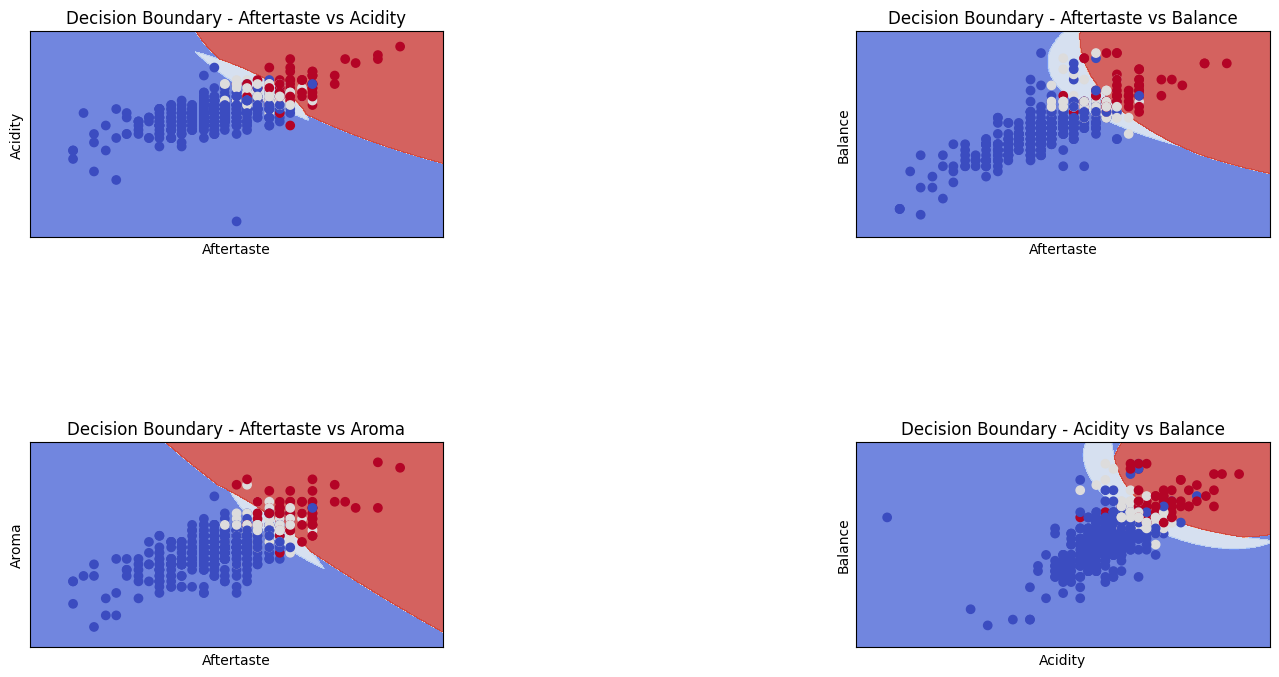

In [ ]:
### START CODE HERE ###
#หา Cor แล้วเลือก Top4 แล้วค่อยจับคู่

selected_pairs = [('Aftertaste', 'Acidity'),
                  ('Aftertaste', 'Balance'),
                  ('Aftertaste', 'Aroma'),
                  ('Acidity', 'Balance')]

plt.figure(figsize=(16, 8))
i = 0
for pair in selected_pairs:

  h = .02  # step size in the mesh

  best_rand= SVC(**grid_best_para)
  best_rand.fit(X_train.loc[:,pair],Y_train)

  # create a mesh to plot in
  x_min, x_max = X_train.loc[:,pair].iloc[:, 0].min() - 1, X_train.loc[:,pair].iloc[:, 0].max() + 1
  y_min, y_max = X_train.loc[:,pair].iloc[:, 1].min() - 1, X_train.loc[:,pair].iloc[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

  clf = best_rand
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  plt.subplot(2, 2, i + 1)
  plt.subplots_adjust(wspace=1, hspace=1)

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

  # Plot also the training points
  plt.scatter(X_train.loc[:,pair].iloc[:, 0], X_train.loc[:,pair].iloc[:, 1], c=Y_train.values, cmap=plt.cm.coolwarm)
  plt.xlabel(pair[0])
  plt.ylabel(pair[1])
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(f"Decision Boundary - {pair[0]} vs {pair[1]}")
  i += 1

plt.show()



### END CODE HERE ####

### **Random Search**
**Initialize models and Search Space**
- `Support Vector Machine`

Utilize the search space as provided by the Lab direction.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `SVC()`
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
- `SVM: {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 37.575, 75.05, 112.525, 150.0], 'gamma': [0.01, 0.0325, 0.05500000000000001, 0.0775, 0.1], 'degree': [2, 3]}`

</details>

In [ ]:
### START CODE HERE ###

kernels = ['linear','rbf','poly']
rand_c_value = list(np.linspace(0.01,10,5,dtype = float))
rand_gamma = list(np.linspace(0.01,1,5,dtype = float))
rand_degree = [2,3]

param_grid_rand = {
    'kernel': kernels,
    'C': rand_c_value,
    'gamma': rand_gamma,
    'degree': rand_degree
}

svc_model = SVC()


### END CODE HERE ###

Perform the random search and print out the best parameter set along with the corresponding best score for all models. Subsequently, print the mean and standard deviation of the scores for all parameter sets within the random search space for each model.

In [ ]:
### START CODE HERE ###
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
# Define different values for the number of folds in cross-validation
cv_values = [3, 5]

# Perform grid search for each value of cv
for cv in cv_values:
    # Initialize GridSearchCV with the SVM model, search space, and specified cv value
    rand_search = RandomizedSearchCV(estimator=svc_model, param_distributions=param_grid_rand, cv=cv,n_iter=40)

    # Perform the grid search
    rand_search.fit(X_train, Y_train)

    # Print the best parameter set and corresponding best score for all models with current cv value
    print(f"\nResults for cv={cv}:")
    print("Best Parameter Set and Corresponding Best Score:")
    print(rand_search.best_params_)
    print(rand_search.best_score_)

    # Print the mean and standard deviation of the scores for all parameter sets within the grid search space for each model
    print("\nMean and Standard Deviation of Scores for All Parameter Sets:")
    means = rand_search.cv_results_['mean_test_score']
    stds = rand_search.cv_results_['std_test_score']
    params = rand_search.cv_results_['params']
    for mean, std, params in zip(means, stds, params):
        print(f"Mean: {mean}, Standard Deviation: {std}, Parameters: {params}")
### END CODE HERE ###





### END CODE HERE ###


Results for cv=3:
Best Parameter Set and Corresponding Best Score:
{'kernel': 'rbf', 'gamma': 0.01, 'degree': 2, 'C': 10.0}
0.9116809116809117

Mean and Standard Deviation of Scores for All Parameter Sets:
Mean: 0.9074074074074074, Standard Deviation: 0.004029098468299402, Parameters: {'kernel': 'linear', 'gamma': 0.505, 'degree': 2, 'C': 5.005}
Mean: 0.9031339031339032, Standard Deviation: 0.005329996277455738, Parameters: {'kernel': 'linear', 'gamma': 0.505, 'degree': 2, 'C': 7.5024999999999995}
Mean: 0.7863247863247863, Standard Deviation: 0.006978603255792505, Parameters: {'kernel': 'linear', 'gamma': 1.0, 'degree': 2, 'C': 0.01}
Mean: 0.8803418803418803, Standard Deviation: 0.009231824356706372, Parameters: {'kernel': 'rbf', 'gamma': 0.2575, 'degree': 2, 'C': 10.0}
Mean: 0.9116809116809117, Standard Deviation: 0.0175624330568917, Parameters: {'kernel': 'rbf', 'gamma': 0.01, 'degree': 2, 'C': 10.0}
Mean: 0.8817663817663818, Standard Deviation: 0.022433070866130538, Parameters: {'k

Utilize the best parameters obtained from random search to create a SVM model. Compare the predicted values of the model with those in the Y_test DataFrame, calculate the confusion matrix the precision, recall, F1-Score, support of each output class, and model accuracy.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
- Confusion Matrix:
 [[217   6   1]
 [ 11   32   3]
 [  0    5  26]]
   Precision  Recall  F1-Score  Support
0      0.952   0.969     0.960      224
1      0.744   0.696     0.719       46
2      0.867   0.839     0.852       31

Accuracy:  0.9136212624584718
```

</details>


In [ ]:
### START CODE HERE ###

rand_best_para = rand_search.best_params_ #หา best para
svc_model = SVC(**rand_best_para) #เอาparaมาสร้างโมเดล
svc_model.fit(X_train,Y_train) #train
Y_pred_rand = svc_model.predict(X_test) #เอาโมเดลไปpredict

print("Confusion Matrix")
print(confusion_matrix(Y_test, Y_pred_rand))

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_rand))




### START CODE HERE ###

Confusion Matrix
[[217   1   0]
 [ 19  30   2]
 [  0  10  22]]

Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96       218
           2       0.73      0.59      0.65        51
           3       0.92      0.69      0.79        32

    accuracy                           0.89       301
   macro avg       0.86      0.76      0.80       301
weighted avg       0.89      0.89      0.89       301



**Select 4 pairs of features then polt the decision boundary.**
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html
- For plotting the decision boundary, select features X with a correlation to Y greater than 0.5. This ensures that the decision boundary will depict all three classes.

</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
![image-2.png](attachment:image-2.png)
</details>

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


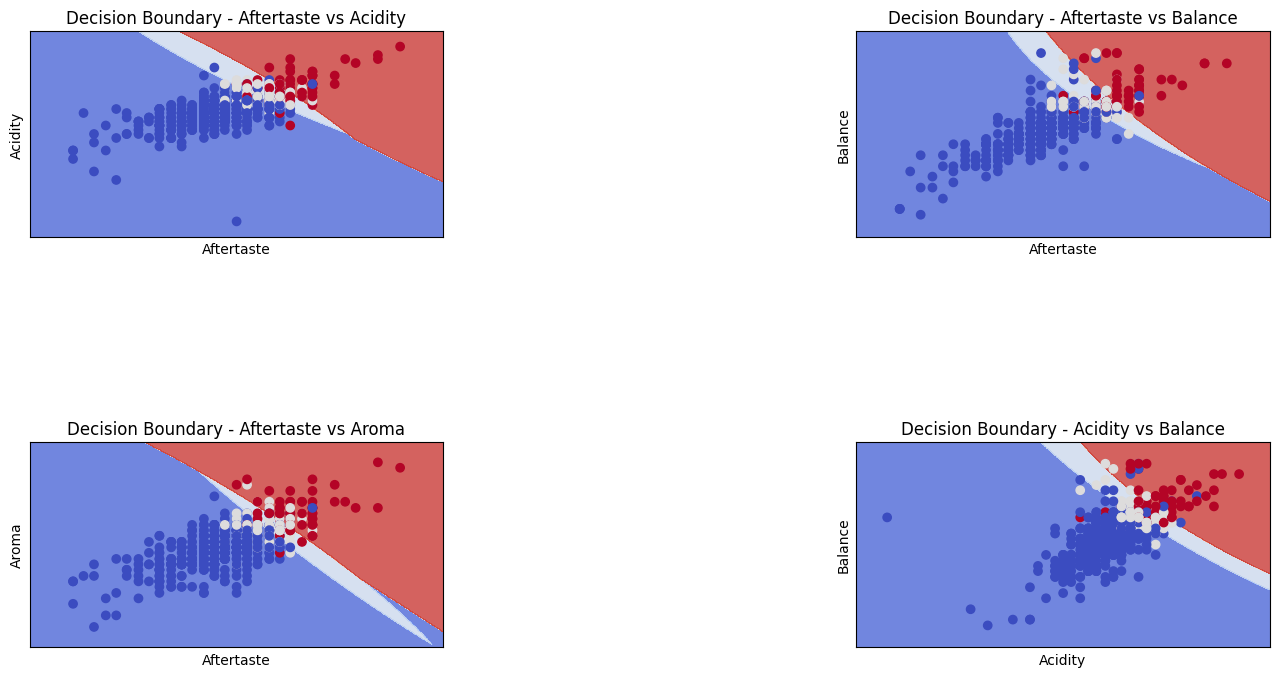

In [ ]:
### START CODE HERE ###


# selected_pairs = [('Aftertaste', 'Acidity'),
#                   ('Aftertaste', 'Balance'),
#                   ('Aftertaste', 'Aroma'),
#                   ('Acidity', 'Balance')]

plt.figure(figsize=(16, 8))
i = 0
for pair in selected_pairs:

  h = .02  # step size in the mesh

  best_rand = SVC(**rand_best_para)
  best_rand.fit(X_train.loc[:,pair],Y_train)

  # create a mesh to plot in
  x_min, x_max = X_train.loc[:,pair].iloc[:, 0].min() - 1, X_train.loc[:,pair].iloc[:, 0].max() + 1
  y_min, y_max = X_train.loc[:,pair].iloc[:, 1].min() - 1, X_train.loc[:,pair].iloc[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

  clf = best_rand
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  plt.subplot(2, 2, i + 1)
  plt.subplots_adjust(wspace=1, hspace=1)

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

  # Plot also the training points
  plt.scatter(X_train.loc[:,pair].iloc[:, 0], X_train.loc[:,pair].iloc[:, 1], c=Y_train.values, cmap=plt.cm.coolwarm)
  plt.xlabel(pair[0])
  plt.ylabel(pair[1])
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(f"Decision Boundary - {pair[0]} vs {pair[1]}")
  i += 1

plt.show()





### START CODE HERE ###

### Question
1. The dropped feature columns with corr > 0.8 are correlated to which columns?
2. Compare the top 3 best model parameters from gridsearchCV() and randomizedsearchcv(), are they different? Explain.
3. Choose a combination of model parameters that yield the highest standard deviation in cross-validation scores. Enumerate the scores for each cross-validation iteration and provide an explanation for the potential reasons behind the observed variations.
4. Show correlation values between Y output and each X input and how the top 2 highest and 2 lowest correlation of the pair Y and each X related to the decision boundary of 3 class output?

**Ans**
1.Flavor

2.Gird_search
Results for cv=3:

{'C': 1.0, 'degree': 2, 'gamma': 0.01, 'kernel': 'linear'}

{'C': 1.0, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}

{'C': 1.0, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}

Rand_search

{'kernel': 'poly', 'gamma': 0.01, 'degree': 3, 'C': 1.0}

{'kernel': 'linear', 'gamma': 10.0, 'degree': 2, 'C': 50.5}

{'kernel': 'rbf', 'gamma': 2.5075, 'degree': 3, 'C': 50.5}

3.Best score for cv=3: 0.9116809116809117

Best score for cv=5: 0.9074265450861196

ค่า k ที่มากขึ้นจะทำให้มี การแบ่งข้อมูลที่มากขึ้น และรอบการ train ที่เพิ่มขึ้น ส่งผลให้ค่า k ที่มากกว่า จะมีประสิทธิภาพที่ดีกว่า

4.Top 2 highest correlated features

Aftertaste: 0.628

Acidity: 0.609

Top 2 lowest correlated features

Moisture: -0.099

altitude_mean_meters: -0.020